# Business Understanding

## Project Domain

In [ ]:
Klasifikasi jenis bunga Iris berdasarkan ukuran sepal dan petal.

## Problem Statements

In [ ]:
Bagaimana cara mengklasifikasikan bunga Iris ke dalam 3 kategori (Setosa, Versicolor, Virginica) berdasarkan fitur ukurannya?

## Goals

Membangun model klasifikasi ANN yang mampu mengklasifikasikan jenis bunga dengan akurasi minimal 80%

In [ ]:

Menggunakan model Artificial Neural Network (ANN) dengan dense layer untuk mempelajari pola dari data bunga dan memprediksi spesiesnya.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"trimalama","key":"0c3d0e32367f5b79b876e332fc0bf7bd"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d arshid/iris-flower-dataset


Dataset URL: https://www.kaggle.com/datasets/arshid/iris-flower-dataset
License(s): CC0-1.0


In [4]:
!mkdir iris-flower-dataset
!unzip iris-flower-dataset.zip -diris-flower-dataset
!lsiris-flower-dataset


Archive:  iris-flower-dataset.zip
  inflating: iris-flower-dataset/IRIS.csv  
/bin/bash: line 1: lsiris-flower-dataset: command not found


In [5]:
!kaggle datasets download -d arshid/iris-flower-dataset
!unzip iris-flower-dataset.zip-d dataset


Dataset URL: https://www.kaggle.com/datasets/arshid/iris-flower-dataset
License(s): CC0-1.0
iris-flower-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open iris-flower-dataset.zip-d, iris-flower-dataset.zip-d.zip or iris-flower-dataset.zip-d.ZIP.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



from sklearn.preprocessing import LabelEncoder




import pickle


In [11]:
df = pd.read_csv('/content/iris-flower-dataset/IRIS.csv')


## Exploratory Data Analysis

In [12]:

df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


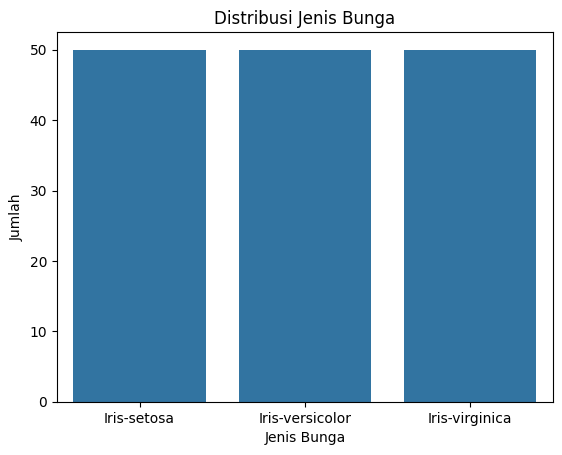

In [13]:
sns.countplot(x='species', data=df)
plt.title('Distribusi Jenis Bunga')
plt.xlabel('Jenis Bunga')
plt.ylabel('Jumlah')
plt.show()


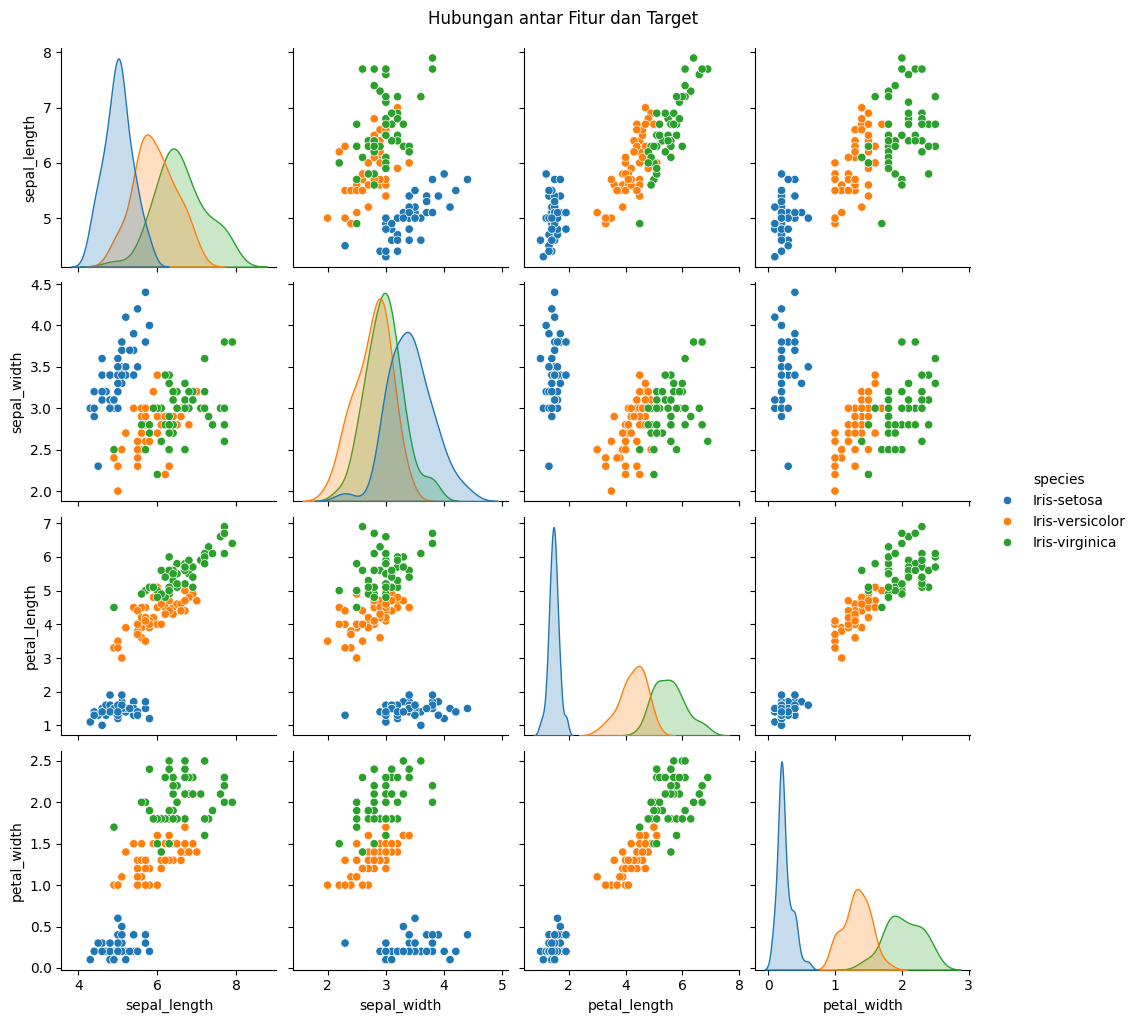

In [14]:
sns.pairplot(df, hue='species')
plt.suptitle('Hubungan antar Fitur dan Target', y=1.02)
plt.show()


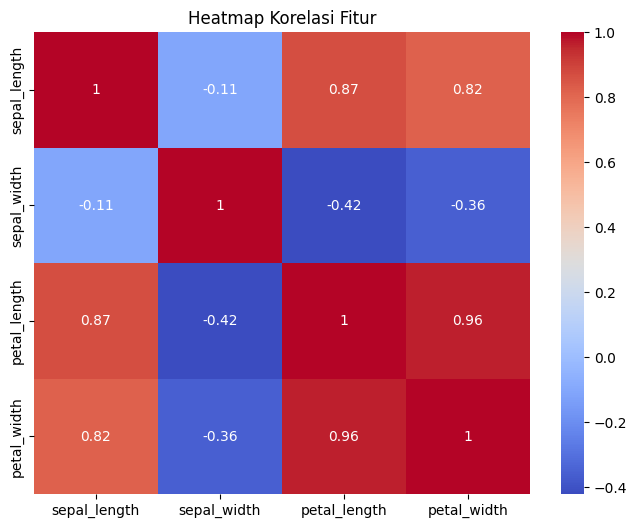

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()


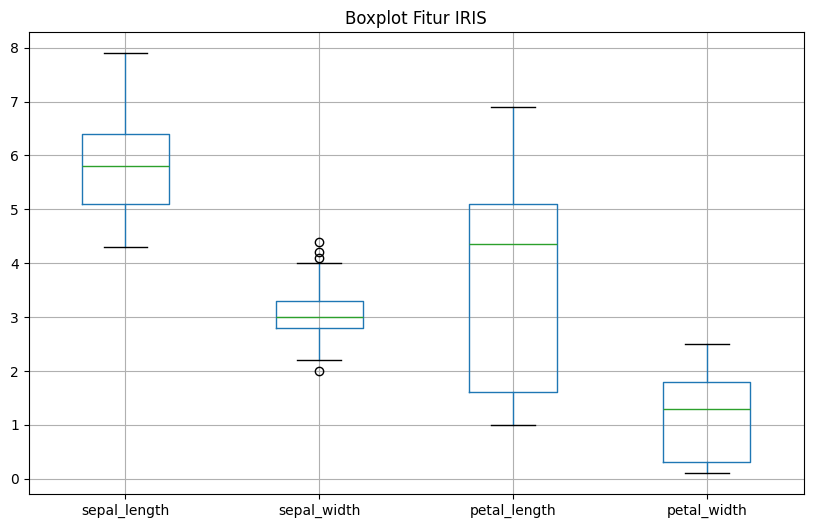

In [16]:
plt.figure(figsize=(10,6))
df.drop('species', axis=1).boxplot()
plt.title('Boxplot Fitur IRIS')
plt.show()


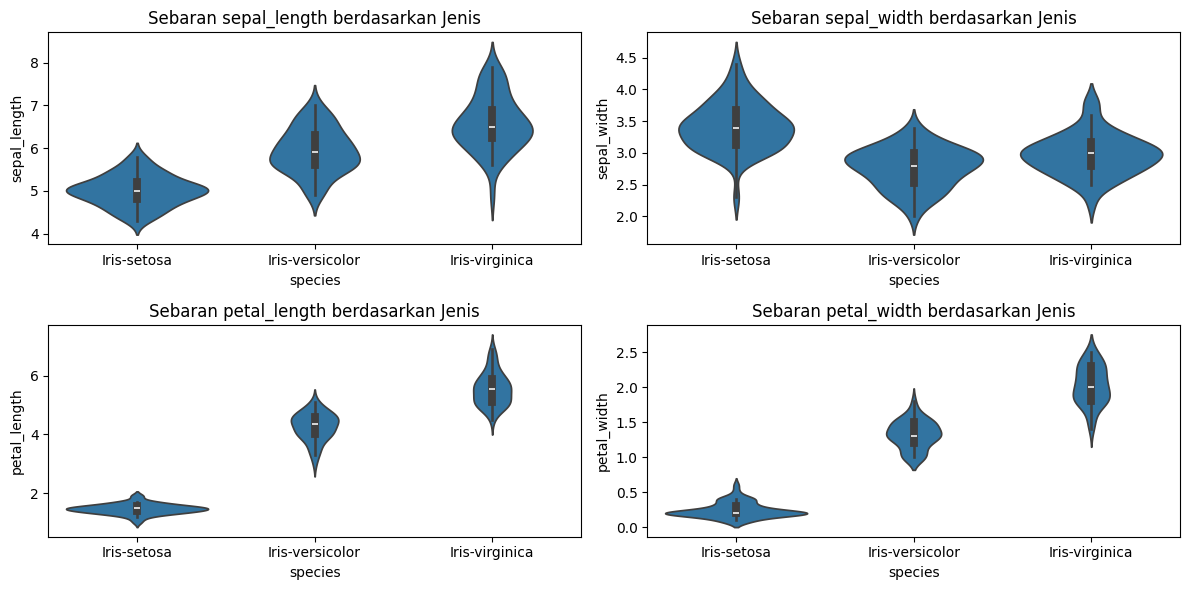

In [17]:
plt.figure(figsize=(12,6))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=col, data=df)
    plt.title(f'Sebaran {col} berdasarkan Jenis')
plt.tight_layout()
plt.show()


# Data Preparation

In [18]:
X = df.drop('species', axis=1)  # Fitur
y = df['species']              # Label


In [19]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


# Modeling

In [25]:
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)


In [26]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))   # Input layer
model.add(Dense(6, activation='relu'))                # Hidden layer
model.add(Dense(3, activation='softmax'))             # Output layer (3 kelas)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [28]:
history = model.fit(X_train, y_train_cat,
                    epochs=100,
                    batch_size=8,
                    validation_data=(X_test, y_test_cat),
                    verbose=1)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.3531 - loss: 1.0985 - val_accuracy: 0.3333 - val_loss: 1.0804
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3736 - loss: 1.0487 - val_accuracy: 0.3333 - val_loss: 1.0169
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2954 - loss: 1.0160 - val_accuracy: 0.3333 - val_loss: 0.9532
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3364 - loss: 0.9334 - val_accuracy: 0.5667 - val_loss: 0.8932
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5860 - loss: 0.8752 - val_accuracy: 0.7333 - val_loss: 0.8361
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8650 - loss: 0.8172 - val_accuracy: 0.8333 - val_loss: 0.7829
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9257 - loss: 0.7630 - val_accuracy: 0.7667 - val_loss: 0.7331
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8832 - loss: 0.7031 - val_accuracy: 0.76

In [29]:
loss, acc = model.evaluate(X_test, y_test_cat)
print(f"Akurasi Model: {acc*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9667 - loss: 0.1085
Akurasi Model: 96.67%


# Evaluation

In [30]:
loss, acc = model.evaluate(X_test, y_test_cat)
print(f"Akurasi Model: {acc*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9667 - loss: 0.1085
Akurasi Model: 96.67%


In [31]:


# Prediksi dengan model
y_pred_prob = model.predict(X_test)

# Ambil index kelas tertinggi
y_pred = np.argmax(y_pred_prob, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


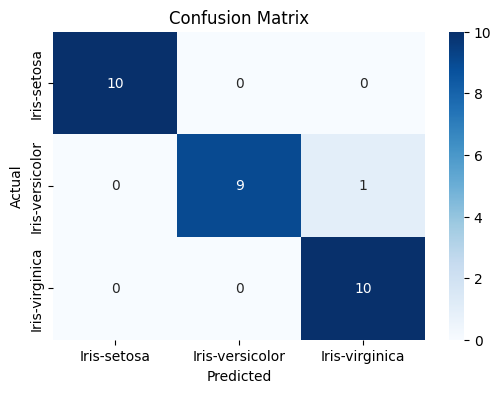

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=le.classes_))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



# Deployment

## Model Simulation

In [34]:

sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Format: [sepal_length, sepal_width, petal_length, petal_width]


In [35]:
sample_scaled = scaler.transform(sample)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
prediction = model.predict(sample_scaled)
predicted_class = np.argmax(prediction, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [37]:
predicted_label = le.inverse_transform(predicted_class)
print(f"Jenis bunga yang diprediksi: {predicted_label[0]}")


Jenis bunga yang diprediksi: Iris-setosa


In [38]:



joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

## Save Model

In [39]:
model.save('iris_model.h5')


In [40]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open('iris_model.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpn30zt_os'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139285120908176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139285042019792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139285042017488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139285042016720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139285037663248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139285037664208: TensorSpec(shape=(), dtype=tf.resource, name=None)
